<a href="https://colab.research.google.com/github/thorat1607/thorat1607/blob/Devtern/Task_3_Handwashing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

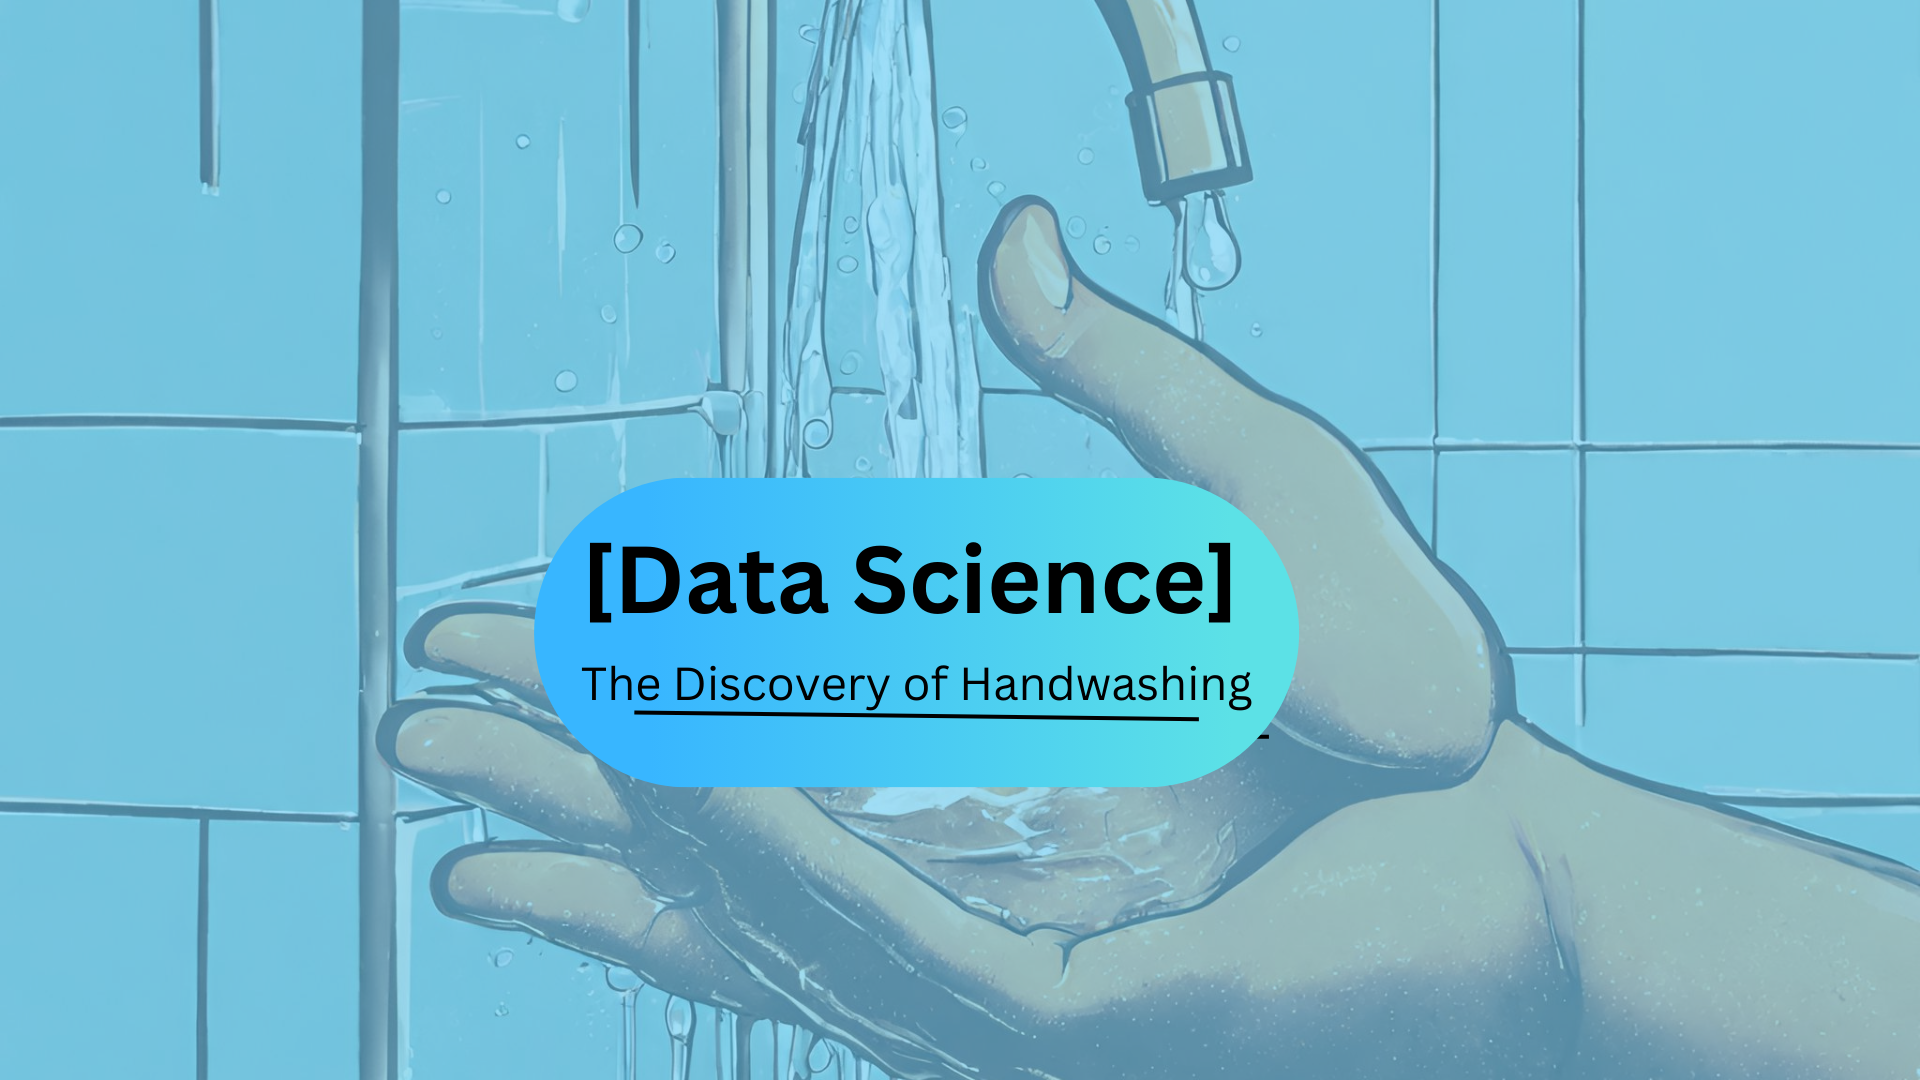

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    12 non-null     int64 
 1   births  12 non-null     int64 
 2   deaths  12 non-null     int64 
 3   clinic  12 non-null     object
dtypes: int64(3), object(1)
memory usage: 512.0+ bytes
None
   year  births  deaths    clinic
0  1841    3036     237  clinic 1
1  1842    3287     518  clinic 1
2  1843    3060     274  clinic 1
3  1844    3157     260  clinic 1
4  1845    3492     241  clinic 1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    98 non-null     object
 1   births  98 non-null     int64 
 2   deaths  98 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.4+ KB
None
         date  births  deaths
0  1841-01-01     254      37
1  1841-02-01     239

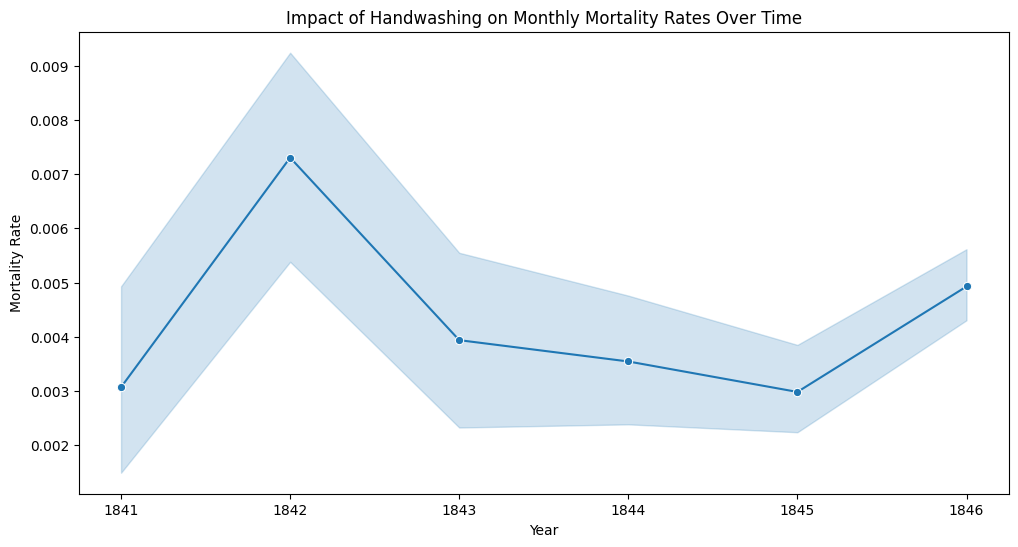

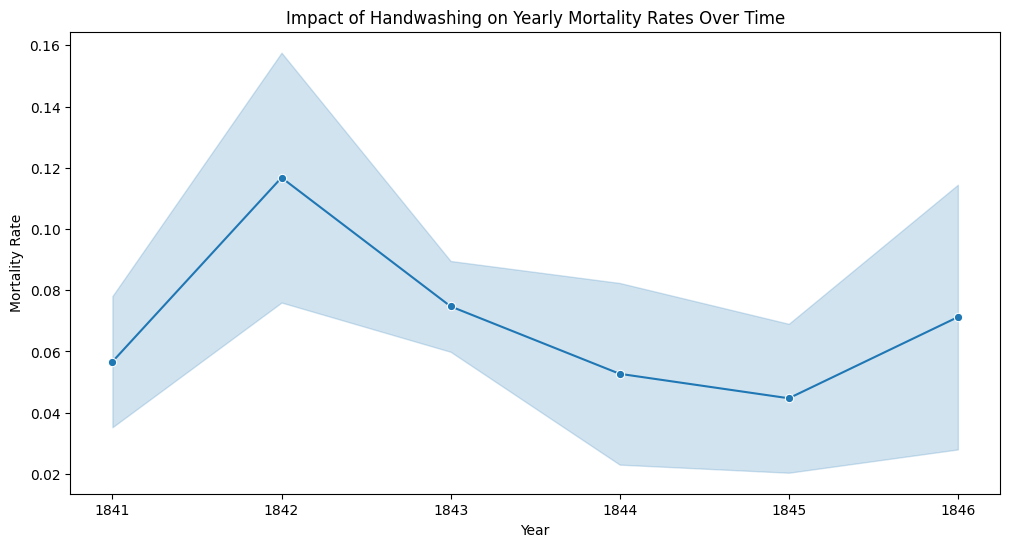

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Read the yearly deaths dataset
yearly_deaths = pd.read_csv('/content/yearly_deaths_by_clinic.csv')

# Step 3: Explore the dataset
print(yearly_deaths.info())
print(yearly_deaths.head())

# Step 4: Read and explore the monthly deaths dataset
monthly_deaths = pd.read_csv('/content/monthly_deaths.csv')
print(monthly_deaths.info())
print(monthly_deaths.head())

# Step 5: Investigate the number of deaths from 1841 to 1846
# Assuming 'clinic' is a categorical variable indicating the type of clinic
deaths_by_month_clinic = monthly_deaths.groupby(['date'])[['deaths']].sum().reset_index()

# Extract year from the 'date' column
deaths_by_month_clinic['year'] = pd.to_datetime(deaths_by_month_clinic['date']).dt.year

# Calculate mortality rates
# Calculate mortality rates for yearly dataset
yearly_deaths['mortality_rate'] = yearly_deaths['deaths'] / yearly_deaths['births']
births_by_year = yearly_deaths.groupby('year')['births'].sum().reset_index()
deaths_by_month_clinic = pd.merge(deaths_by_month_clinic, births_by_year, on='year', how='left', suffixes=('_deaths', '_births'))
deaths_by_month_clinic['mortality_rate'] = deaths_by_month_clinic['deaths'] / deaths_by_month_clinic['births']

# Data Visualization for Monthly Dataset
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='mortality_rate', marker='o', data=deaths_by_month_clinic)
plt.title('Impact of Handwashing on Monthly Mortality Rates Over Time')
plt.xlabel('Year')
plt.ylabel('Mortality Rate')
plt.show()

# Data Visualization for Yearly Dataset
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='mortality_rate', marker='o', data=yearly_deaths)
plt.title('Impact of Handwashing on Yearly Mortality Rates Over Time')
plt.xlabel('Year')
plt.ylabel('Mortality Rate')
plt.show()
